In [1]:
#Importing packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#Merging files [Merge the monthly data into a master dataset and categorize on types of variables (categorical and numerical)]

df1=pd.read_csv("2018.csv")
df2=pd.read_csv("2019.csv")
df3=pd.read_csv("2020.csv")
df4=pd.read_csv("2021.csv")

merge_df = [df1, df2, df3, df4]  # List of your dataframes
df = pd.concat(merge_df)
df.sort_values('Year') #sorting by year to keep it consistent
df

,Site,Parameter,Date LT,Year,Month,Day,Hour,NowCast Conc,AQI,AQI Category,Raw Conc,Conc Unit,Duration,QC Name
0,Ulaanbaatar,PM2.5 - Principal,01-01-2018 01:00,2018,1,1,1,-999.0,-999,NaN,457,UG/M3,1 Hr,Valid
1,Ulaanbaatar,PM2.5 - Principal,01-01-2018 02:00,2018,1,1,2,506.4,504,Hazardous,536,UG/M3,1 Hr,Valid
2,Ulaanbaatar,PM2.5 - Principal,01-01-2018 03:00,2018,1,1,3,493.6,496,Hazardous,484,UG/M3,1 Hr,Valid
3,Ulaanbaatar,PM2.5 - Principal,01-01-2018 04:00,2018,1,1,4,470.9,481,Hazardous,451,UG/M3,1 Hr,Valid
4,Ulaanbaatar,PM2.5 - Principal,01-01-2018 05:00,2018,1,1,5,467.4,478,Hazardous,464,UG/M3,1 Hr,Valid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3330,Ulaanbaatar,PM2.5 - Principal,31-05-2021 20:00,2021,5,31,20,5.6,23,Good,3,UG/M3,1 Hr,Valid
3331,Ulaanbaatar,PM2.5 - Principal,31-05-2021 21:00,2021,5,31,21,10.3,43,Good,15,UG/M3,1 Hr,Valid
3332,Ulaanbaatar,PM2.5 - Principal,31-05-2021 22:00,2021,5,31,22,22.7,73,Moderate,35,UG/M3,1 Hr,Valid
3333,Ulaanbaatar,PM2.5 - Principal,31-05-2021 23:00,2021,5,31,23,52.9,144,Unhealthy for Sensitive Groups,83,UG/M3,1 Hr,Valid


In [3]:
#Replacing the spaces in column header names with '_' 

df.columns = df.columns.str.replace(' ', '_')
df.head(0) #getting the first row to view updated columns

,Site,Parameter,Date_LT,Year,Month,Day,Hour,NowCast_Conc,AQI,AQI_Category,Raw_Conc,Conc_Unit,Duration,QC_Name


In [4]:
df.to_csv('updated_merged_file.csv') #saving the file

In [5]:
df.info()  #Getting Data Dtype

<class 'pandas.core.frame.DataFrame'>
Index: 26665 entries, 0 to 3334
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Site          26665 non-null  object 
 1   Parameter     26665 non-null  object 
 2   Date_LT       26665 non-null  object 
 3   Year          26665 non-null  int64  
 4   Month         26665 non-null  int64  
 5   Day           26665 non-null  int64  
 6   Hour          26665 non-null  int64  
 7   NowCast_Conc  26665 non-null  float64
 8   AQI           26665 non-null  int64  
 9   AQI_Category  25564 non-null  object 
 10  Raw_Conc      26665 non-null  int64  
 11  Conc_Unit     26665 non-null  object 
 12  Duration      26665 non-null  object 
 13  QC_Name       26665 non-null  object 
dtypes: float64(1), int64(6), object(7)
memory usage: 3.1+ MB


In [6]:
#Convert Date_LT Dtype from object to datetime64 

df['Date_LT'] = pd.to_datetime(df['Date_LT'], errors='ignore', format='mixed')  #If ‘ignore’, then invalid parsing will return the input.
                                                                #errors{‘ignore’, ‘raise’, ‘coerce’}, default ‘raise’

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26665 entries, 0 to 3334
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Site          26665 non-null  object        
 1   Parameter     26665 non-null  object        
 2   Date_LT       26665 non-null  datetime64[ns]
 3   Year          26665 non-null  int64         
 4   Month         26665 non-null  int64         
 5   Day           26665 non-null  int64         
 6   Hour          26665 non-null  int64         
 7   NowCast_Conc  26665 non-null  float64       
 8   AQI           26665 non-null  int64         
 9   AQI_Category  25564 non-null  object        
 10  Raw_Conc      26665 non-null  int64         
 11  Conc_Unit     26665 non-null  object        
 12  Duration      26665 non-null  object        
 13  QC_Name       26665 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(6), object(6)
memory usage: 3.1+ MB


In [8]:
#Checking the date format
df.Date_LT

0      2018-01-01 01:00:00
1      2018-01-01 02:00:00
2      2018-01-01 03:00:00
3      2018-01-01 04:00:00
4      2018-01-01 05:00:00
               ...        
3330   2021-05-31 20:00:00
3331   2021-05-31 21:00:00
3332   2021-05-31 22:00:00
3333   2021-05-31 23:00:00
3334   2021-01-06 00:00:00
Name: Date_LT, Length: 26665, dtype: datetime64[ns]

In [9]:
df #DataFrame with updated col name and format 

,Site,Parameter,Date_LT,Year,Month,Day,Hour,NowCast_Conc,AQI,AQI_Category,Raw_Conc,Conc_Unit,Duration,QC_Name
0,Ulaanbaatar,PM2.5 - Principal,2018-01-01 01:00:00,2018,1,1,1,-999.0,-999,NaN,457,UG/M3,1 Hr,Valid
1,Ulaanbaatar,PM2.5 - Principal,2018-01-01 02:00:00,2018,1,1,2,506.4,504,Hazardous,536,UG/M3,1 Hr,Valid
2,Ulaanbaatar,PM2.5 - Principal,2018-01-01 03:00:00,2018,1,1,3,493.6,496,Hazardous,484,UG/M3,1 Hr,Valid
3,Ulaanbaatar,PM2.5 - Principal,2018-01-01 04:00:00,2018,1,1,4,470.9,481,Hazardous,451,UG/M3,1 Hr,Valid
4,Ulaanbaatar,PM2.5 - Principal,2018-01-01 05:00:00,2018,1,1,5,467.4,478,Hazardous,464,UG/M3,1 Hr,Valid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3330,Ulaanbaatar,PM2.5 - Principal,2021-05-31 20:00:00,2021,5,31,20,5.6,23,Good,3,UG/M3,1 Hr,Valid
3331,Ulaanbaatar,PM2.5 - Principal,2021-05-31 21:00:00,2021,5,31,21,10.3,43,Good,15,UG/M3,1 Hr,Valid
3332,Ulaanbaatar,PM2.5 - Principal,2021-05-31 22:00:00,2021,5,31,22,22.7,73,Moderate,35,UG/M3,1 Hr,Valid
3333,Ulaanbaatar,PM2.5 - Principal,2021-05-31 23:00:00,2021,5,31,23,52.9,144,Unhealthy for Sensitive Groups,83,UG/M3,1 Hr,Valid


# 1.Select the minimum and maximum PM measurements.

In [10]:
#Checking Min & Max for all the Numerical categories to check for Outliers & Accuracy

df.Year.min(), df.Year.max()

(2018, 2021)

In [11]:
df.Date_LT.min(), df.Date_LT.max()

(Timestamp('2018-01-01 01:00:00'), Timestamp('2021-12-05 23:00:00'))

In [12]:
df.Month.min(), df.Month.max()

(1, 12)

In [13]:
df.Day.min(), df.Day.max()

(1, 31)

In [14]:
df.Hour.min(), df.Hour.max()

(0, 23)

In [15]:
#Can see here that we have -999 as outcast and may need to look into it

df.NowCast_Conc.min(), df.NowCast_Conc.max()

(-999.0, 891.0)

In [16]:
#Can see here that we have -999 as outcast and may need to look into it

df.AQI.min(), df.AQI.max()

(-999, 758)

In [17]:
#Can see here that we have -999 as outcast and may need to look into it

df.Raw_Conc.min(), df.Raw_Conc.max()

(-999, 972)

# Can see here that we have -999 as outcast and may need to look into it df.Raw_Conc.min(), df.Raw_Conc.max()

## It can be seen that NowCast_Conc, AQI & Raw_Conc has some extreme values as -999 which is not accurate and should be cleaned further.

In [18]:
#Replacing -999 to NULL throughout the file, by doing this we dont need to create a new column (NowCast_Conc_updated) to update the values using the algorithm

dfNew=df.replace(-999,np.nan)
dfNew.isna().sum()

Site               0
Parameter          0
Date_LT            0
Year               0
Month              0
Day                0
Hour               0
NowCast_Conc    1097
AQI             1101
AQI_Category    1101
Raw_Conc         217
Conc_Unit          0
Duration           0
QC_Name            0
dtype: int64

In [19]:
dfNew #New DataFrame with all -999 value as NULL(NaN)

,Site,Parameter,Date_LT,Year,Month,Day,Hour,NowCast_Conc,AQI,AQI_Category,Raw_Conc,Conc_Unit,Duration,QC_Name
0,Ulaanbaatar,PM2.5 - Principal,2018-01-01 01:00:00,2018,1,1,1,NaN,NaN,NaN,457.0,UG/M3,1 Hr,Valid
1,Ulaanbaatar,PM2.5 - Principal,2018-01-01 02:00:00,2018,1,1,2,506.4,504.0,Hazardous,536.0,UG/M3,1 Hr,Valid
2,Ulaanbaatar,PM2.5 - Principal,2018-01-01 03:00:00,2018,1,1,3,493.6,496.0,Hazardous,484.0,UG/M3,1 Hr,Valid
3,Ulaanbaatar,PM2.5 - Principal,2018-01-01 04:00:00,2018,1,1,4,470.9,481.0,Hazardous,451.0,UG/M3,1 Hr,Valid
4,Ulaanbaatar,PM2.5 - Principal,2018-01-01 05:00:00,2018,1,1,5,467.4,478.0,Hazardous,464.0,UG/M3,1 Hr,Valid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3330,Ulaanbaatar,PM2.5 - Principal,2021-05-31 20:00:00,2021,5,31,20,5.6,23.0,Good,3.0,UG/M3,1 Hr,Valid
3331,Ulaanbaatar,PM2.5 - Principal,2021-05-31 21:00:00,2021,5,31,21,10.3,43.0,Good,15.0,UG/M3,1 Hr,Valid
3332,Ulaanbaatar,PM2.5 - Principal,2021-05-31 22:00:00,2021,5,31,22,22.7,73.0,Moderate,35.0,UG/M3,1 Hr,Valid
3333,Ulaanbaatar,PM2.5 - Principal,2021-05-31 23:00:00,2021,5,31,23,52.9,144.0,Unhealthy for Sensitive Groups,83.0,UG/M3,1 Hr,Valid


# 2. Subtract the minimum measurement from the maximum measurement to get the range.

In [20]:
minimum=dfNew.Raw_Conc.min() #getting mean
maximum=dfNew.Raw_Conc.max()
minimum, maximum

(-15.0, 972.0)

In [21]:
weight=maximum-minimum
weight

987.0

In [22]:
#Minimum of each set of 12 rows of 'Raw_Conc'

mdf = pd.read_csv('updatedfile.csv',usecols=['Raw_Conc'])
step=12
dftestmin = mdf.groupby(mdf.index//step).min()
print(dftestmin)

      Raw_Conc
0            0
1           48
2            0
3            0
4            0
...        ...
2218        12
2219         2
2220         6
2221        -6
2222        49

[2223 rows x 1 columns]


In [23]:
#Maximum of each set of 12 rows of 'Raw_Conc'

dftestmax = mdf.groupby(mdf.index//step).max()
print(dftestmax)

      Raw_Conc
0          536
1          450
2          449
3          111
4          412
...        ...
2218       211
2219        92
2220        53
2221        83
2222        49

[2223 rows x 1 columns]


In [24]:
Max_Min = dftestmax - dftestmin
print(Max_Min)

      Raw_Conc
0          536
1          402
2          449
3          111
4          412
...        ...
2218       199
2219        90
2220        47
2221        89
2222         0

[2223 rows x 1 columns]


# 3. Divide the range by the maximum measurement in the 12 hour period to get the scaled rate of change.

# 4. Divide the range by the maximum measurement in the 12 hour period to get the scaled rate of change.

In [25]:
weight = 1-(Max_Min/dftestmax)
print(weight)

      Raw_Conc
0     0.000000
1     0.106667
2     0.000000
3     0.000000
4     0.000000
...        ...
2218  0.056872
2219  0.021739
2220  0.113208
2221 -0.072289
2222  1.000000

[2223 rows x 1 columns]


# 5. If the weight factor is less than 0.5, then set it equal to 0.5.

In [26]:
#replacing less than 0.5 values with 0.5

weight[weight < 0.5] = 0.5
print(weight)

      Raw_Conc
0          0.5
1          0.5
2          0.5
3          0.5
4          0.5
...        ...
2218       0.5
2219       0.5
2220       0.5
2221       0.5
2222       1.0

[2223 rows x 1 columns]


In [27]:
#Repeating each row 12 times inorder to get the dataframe row intact

dfNew['Nowcast_updated'] = pd.DataFrame(np.repeat(weight.values, 12, axis=0))
dfNew

,Site,Parameter,Date_LT,Year,Month,Day,Hour,NowCast_Conc,AQI,AQI_Category,Raw_Conc,Conc_Unit,Duration,QC_Name,Nowcast_updated
0,Ulaanbaatar,PM2.5 - Principal,2018-01-01 01:00:00,2018,1,1,1,NaN,NaN,NaN,457.0,UG/M3,1 Hr,Valid,0.5
1,Ulaanbaatar,PM2.5 - Principal,2018-01-01 02:00:00,2018,1,1,2,506.4,504.0,Hazardous,536.0,UG/M3,1 Hr,Valid,0.5
2,Ulaanbaatar,PM2.5 - Principal,2018-01-01 03:00:00,2018,1,1,3,493.6,496.0,Hazardous,484.0,UG/M3,1 Hr,Valid,0.5
3,Ulaanbaatar,PM2.5 - Principal,2018-01-01 04:00:00,2018,1,1,4,470.9,481.0,Hazardous,451.0,UG/M3,1 Hr,Valid,0.5
4,Ulaanbaatar,PM2.5 - Principal,2018-01-01 05:00:00,2018,1,1,5,467.4,478.0,Hazardous,464.0,UG/M3,1 Hr,Valid,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3330,Ulaanbaatar,PM2.5 - Principal,2021-05-31 20:00:00,2021,5,31,20,5.6,23.0,Good,3.0,UG/M3,1 Hr,Valid,0.5
3331,Ulaanbaatar,PM2.5 - Principal,2021-05-31 21:00:00,2021,5,31,21,10.3,43.0,Good,15.0,UG/M3,1 Hr,Valid,0.5
3332,Ulaanbaatar,PM2.5 - Principal,2021-05-31 22:00:00,2021,5,31,22,22.7,73.0,Moderate,35.0,UG/M3,1 Hr,Valid,0.5
3333,Ulaanbaatar,PM2.5 - Principal,2021-05-31 23:00:00,2021,5,31,23,52.9,144.0,Unhealthy for Sensitive Groups,83.0,UG/M3,1 Hr,Valid,0.5


# 6. Multiply each hourly measurement by the weight factor raised to the power of the number of hours ago the value was measured (for the current hour, the factor is raised to the zero power).

In [28]:
dfNew['Nowcast_newupdate'] = dfNew['Raw_Conc'] * pow(dfNew['Nowcast_updated'],dfNew['Hour'])    
dfNew

,Site,Parameter,Date_LT,Year,Month,Day,Hour,NowCast_Conc,AQI,AQI_Category,Raw_Conc,Conc_Unit,Duration,QC_Name,Nowcast_updated,Nowcast_newupdate
0,Ulaanbaatar,PM2.5 - Principal,2018-01-01 01:00:00,2018,1,1,1,NaN,NaN,NaN,457.0,UG/M3,1 Hr,Valid,0.5,228.500000
1,Ulaanbaatar,PM2.5 - Principal,2018-01-01 02:00:00,2018,1,1,2,506.4,504.0,Hazardous,536.0,UG/M3,1 Hr,Valid,0.5,134.000000
2,Ulaanbaatar,PM2.5 - Principal,2018-01-01 03:00:00,2018,1,1,3,493.6,496.0,Hazardous,484.0,UG/M3,1 Hr,Valid,0.5,60.500000
3,Ulaanbaatar,PM2.5 - Principal,2018-01-01 04:00:00,2018,1,1,4,470.9,481.0,Hazardous,451.0,UG/M3,1 Hr,Valid,0.5,28.187500
4,Ulaanbaatar,PM2.5 - Principal,2018-01-01 05:00:00,2018,1,1,5,467.4,478.0,Hazardous,464.0,UG/M3,1 Hr,Valid,0.5,14.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3330,Ulaanbaatar,PM2.5 - Principal,2021-05-31 20:00:00,2021,5,31,20,5.6,23.0,Good,3.0,UG/M3,1 Hr,Valid,0.5,0.000003
3331,Ulaanbaatar,PM2.5 - Principal,2021-05-31 21:00:00,2021,5,31,21,10.3,43.0,Good,15.0,UG/M3,1 Hr,Valid,0.5,0.000007
3332,Ulaanbaatar,PM2.5 - Principal,2021-05-31 22:00:00,2021,5,31,22,22.7,73.0,Moderate,35.0,UG/M3,1 Hr,Valid,0.5,0.000008
3333,Ulaanbaatar,PM2.5 - Principal,2021-05-31 23:00:00,2021,5,31,23,52.9,144.0,Unhealthy for Sensitive Groups,83.0,UG/M3,1 Hr,Valid,0.5,0.000010


# 7. Compute the NowCast by summing the products from Step 6 and dividing by the sum of the weight factor raised to the power of the number of hours ago each value was measured.

In [29]:
final_prod = dfNew['Nowcast_newupdate'].sum() / pow(dfNew['Nowcast_updated'],dfNew['Hour']).sum()
final_prod

48.32179800839755

In [30]:
#Replacing Null value with NowCast value which we obtained in step 6

dfNew['NowCast_Conc']=dfNew['NowCast_Conc'].replace(np.nan,final_prod)
dfNew

,Site,Parameter,Date_LT,Year,Month,Day,Hour,NowCast_Conc,AQI,AQI_Category,Raw_Conc,Conc_Unit,Duration,QC_Name,Nowcast_updated,Nowcast_newupdate
0,Ulaanbaatar,PM2.5 - Principal,2018-01-01 01:00:00,2018,1,1,1,48.321798,NaN,NaN,457.0,UG/M3,1 Hr,Valid,0.5,228.500000
1,Ulaanbaatar,PM2.5 - Principal,2018-01-01 02:00:00,2018,1,1,2,506.400000,504.0,Hazardous,536.0,UG/M3,1 Hr,Valid,0.5,134.000000
2,Ulaanbaatar,PM2.5 - Principal,2018-01-01 03:00:00,2018,1,1,3,493.600000,496.0,Hazardous,484.0,UG/M3,1 Hr,Valid,0.5,60.500000
3,Ulaanbaatar,PM2.5 - Principal,2018-01-01 04:00:00,2018,1,1,4,470.900000,481.0,Hazardous,451.0,UG/M3,1 Hr,Valid,0.5,28.187500
4,Ulaanbaatar,PM2.5 - Principal,2018-01-01 05:00:00,2018,1,1,5,467.400000,478.0,Hazardous,464.0,UG/M3,1 Hr,Valid,0.5,14.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3330,Ulaanbaatar,PM2.5 - Principal,2021-05-31 20:00:00,2021,5,31,20,5.600000,23.0,Good,3.0,UG/M3,1 Hr,Valid,0.5,0.000003
3331,Ulaanbaatar,PM2.5 - Principal,2021-05-31 21:00:00,2021,5,31,21,10.300000,43.0,Good,15.0,UG/M3,1 Hr,Valid,0.5,0.000007
3332,Ulaanbaatar,PM2.5 - Principal,2021-05-31 22:00:00,2021,5,31,22,22.700000,73.0,Moderate,35.0,UG/M3,1 Hr,Valid,0.5,0.000008
3333,Ulaanbaatar,PM2.5 - Principal,2021-05-31 23:00:00,2021,5,31,23,52.900000,144.0,Unhealthy for Sensitive Groups,83.0,UG/M3,1 Hr,Valid,0.5,0.000010


# 8. Convert this value to an AQI. A concentration to AQI converter is available at https://airnow.gov/aqi/aqi-calculator-concentration

In [31]:
!pip install python-aqi

In [32]:
#By using Pyhton's AQI package we will convert 'NowCast_Conc' value to 'AQI' value
#Below is the syntax to convert '48.321798' to AQI with package. As we got this value with the algorithm, we will replace every -999 with it's AQI value throughout.

import aqi
myaqi = aqi.to_iaqi(aqi.POLLUTANT_PM25, '48.321798', algo=aqi.ALGO_EPA)
myaqi

Decimal('133')

In [33]:
#Replacing Null value of AQI column with the value obtained using AQI package

dfNew['AQI']=dfNew['AQI'].replace(np.nan,133)
dfNew

,Site,Parameter,Date_LT,Year,Month,Day,Hour,NowCast_Conc,AQI,AQI_Category,Raw_Conc,Conc_Unit,Duration,QC_Name,Nowcast_updated,Nowcast_newupdate
0,Ulaanbaatar,PM2.5 - Principal,2018-01-01 01:00:00,2018,1,1,1,48.321798,133.0,NaN,457.0,UG/M3,1 Hr,Valid,0.5,228.500000
1,Ulaanbaatar,PM2.5 - Principal,2018-01-01 02:00:00,2018,1,1,2,506.400000,504.0,Hazardous,536.0,UG/M3,1 Hr,Valid,0.5,134.000000
2,Ulaanbaatar,PM2.5 - Principal,2018-01-01 03:00:00,2018,1,1,3,493.600000,496.0,Hazardous,484.0,UG/M3,1 Hr,Valid,0.5,60.500000
3,Ulaanbaatar,PM2.5 - Principal,2018-01-01 04:00:00,2018,1,1,4,470.900000,481.0,Hazardous,451.0,UG/M3,1 Hr,Valid,0.5,28.187500
4,Ulaanbaatar,PM2.5 - Principal,2018-01-01 05:00:00,2018,1,1,5,467.400000,478.0,Hazardous,464.0,UG/M3,1 Hr,Valid,0.5,14.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3330,Ulaanbaatar,PM2.5 - Principal,2021-05-31 20:00:00,2021,5,31,20,5.600000,23.0,Good,3.0,UG/M3,1 Hr,Valid,0.5,0.000003
3331,Ulaanbaatar,PM2.5 - Principal,2021-05-31 21:00:00,2021,5,31,21,10.300000,43.0,Good,15.0,UG/M3,1 Hr,Valid,0.5,0.000007
3332,Ulaanbaatar,PM2.5 - Principal,2021-05-31 22:00:00,2021,5,31,22,22.700000,73.0,Moderate,35.0,UG/M3,1 Hr,Valid,0.5,0.000008
3333,Ulaanbaatar,PM2.5 - Principal,2021-05-31 23:00:00,2021,5,31,23,52.900000,144.0,Unhealthy for Sensitive Groups,83.0,UG/M3,1 Hr,Valid,0.5,0.000010


In [34]:
dfNew.info() #Checking the datatype of each column

<class 'pandas.core.frame.DataFrame'>
Index: 26665 entries, 0 to 3334
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Site               26665 non-null  object        
 1   Parameter          26665 non-null  object        
 2   Date_LT            26665 non-null  datetime64[ns]
 3   Year               26665 non-null  int64         
 4   Month              26665 non-null  int64         
 5   Day                26665 non-null  int64         
 6   Hour               26665 non-null  int64         
 7   NowCast_Conc       26665 non-null  float64       
 8   AQI                26665 non-null  float64       
 9   AQI_Category       25564 non-null  object        
 10  Raw_Conc           26448 non-null  float64       
 11  Conc_Unit          26665 non-null  object        
 12  Duration           26665 non-null  object        
 13  QC_Name            26665 non-null  object        
 14  Nowcast_upda

In [35]:
#Using continuous data filling all the missing values in the catergorical column.

dfNew.loc[dfNew['AQI'].between(0,50), 'AQI_Category'] = 'Good'
dfNew.loc[dfNew['AQI'].between(51,100),'AQI_Category'] = 'Moderate'
dfNew.loc[dfNew['AQI'].between(101,150),'AQI_Category'] = 'Unhealthy for Sensitive Groups'
dfNew.loc[dfNew['AQI'].between(151,200),'AQI_Category'] = 'Unhealthy'
dfNew.loc[dfNew['AQI'].between(201,300),'AQI_Category'] = 'Very Unhealthy'
dfNew.loc[dfNew['AQI']>=301,'AQI_Category'] = 'Hazardous'

dfNew

,Site,Parameter,Date_LT,Year,Month,Day,Hour,NowCast_Conc,AQI,AQI_Category,Raw_Conc,Conc_Unit,Duration,QC_Name,Nowcast_updated,Nowcast_newupdate
0,Ulaanbaatar,PM2.5 - Principal,2018-01-01 01:00:00,2018,1,1,1,48.321798,133.0,Unhealthy for Sensitive Groups,457.0,UG/M3,1 Hr,Valid,0.5,228.500000
1,Ulaanbaatar,PM2.5 - Principal,2018-01-01 02:00:00,2018,1,1,2,506.400000,504.0,Hazardous,536.0,UG/M3,1 Hr,Valid,0.5,134.000000
2,Ulaanbaatar,PM2.5 - Principal,2018-01-01 03:00:00,2018,1,1,3,493.600000,496.0,Hazardous,484.0,UG/M3,1 Hr,Valid,0.5,60.500000
3,Ulaanbaatar,PM2.5 - Principal,2018-01-01 04:00:00,2018,1,1,4,470.900000,481.0,Hazardous,451.0,UG/M3,1 Hr,Valid,0.5,28.187500
4,Ulaanbaatar,PM2.5 - Principal,2018-01-01 05:00:00,2018,1,1,5,467.400000,478.0,Hazardous,464.0,UG/M3,1 Hr,Valid,0.5,14.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3330,Ulaanbaatar,PM2.5 - Principal,2021-05-31 20:00:00,2021,5,31,20,5.600000,23.0,Good,3.0,UG/M3,1 Hr,Valid,0.5,0.000003
3331,Ulaanbaatar,PM2.5 - Principal,2021-05-31 21:00:00,2021,5,31,21,10.300000,43.0,Good,15.0,UG/M3,1 Hr,Valid,0.5,0.000007
3332,Ulaanbaatar,PM2.5 - Principal,2021-05-31 22:00:00,2021,5,31,22,22.700000,73.0,Moderate,35.0,UG/M3,1 Hr,Valid,0.5,0.000008
3333,Ulaanbaatar,PM2.5 - Principal,2021-05-31 23:00:00,2021,5,31,23,52.900000,144.0,Unhealthy for Sensitive Groups,83.0,UG/M3,1 Hr,Valid,0.5,0.000010


In [36]:
dfNew.isna().sum()

Site                   0
Parameter              0
Date_LT                0
Year                   0
Month                  0
Day                    0
Hour                   0
NowCast_Conc           0
AQI                    0
AQI_Category           0
Raw_Conc             217
Conc_Unit              0
Duration               0
QC_Name                0
Nowcast_updated        0
Nowcast_newupdate    217
dtype: int64

In [37]:
#Dropping the columns used for calculation

Final_file = dfNew.drop(columns=['Nowcast_updated','Nowcast_newupdate'])
Final_file

,Site,Parameter,Date_LT,Year,Month,Day,Hour,NowCast_Conc,AQI,AQI_Category,Raw_Conc,Conc_Unit,Duration,QC_Name
0,Ulaanbaatar,PM2.5 - Principal,2018-01-01 01:00:00,2018,1,1,1,48.321798,133.0,Unhealthy for Sensitive Groups,457.0,UG/M3,1 Hr,Valid
1,Ulaanbaatar,PM2.5 - Principal,2018-01-01 02:00:00,2018,1,1,2,506.400000,504.0,Hazardous,536.0,UG/M3,1 Hr,Valid
2,Ulaanbaatar,PM2.5 - Principal,2018-01-01 03:00:00,2018,1,1,3,493.600000,496.0,Hazardous,484.0,UG/M3,1 Hr,Valid
3,Ulaanbaatar,PM2.5 - Principal,2018-01-01 04:00:00,2018,1,1,4,470.900000,481.0,Hazardous,451.0,UG/M3,1 Hr,Valid
4,Ulaanbaatar,PM2.5 - Principal,2018-01-01 05:00:00,2018,1,1,5,467.400000,478.0,Hazardous,464.0,UG/M3,1 Hr,Valid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3330,Ulaanbaatar,PM2.5 - Principal,2021-05-31 20:00:00,2021,5,31,20,5.600000,23.0,Good,3.0,UG/M3,1 Hr,Valid
3331,Ulaanbaatar,PM2.5 - Principal,2021-05-31 21:00:00,2021,5,31,21,10.300000,43.0,Good,15.0,UG/M3,1 Hr,Valid
3332,Ulaanbaatar,PM2.5 - Principal,2021-05-31 22:00:00,2021,5,31,22,22.700000,73.0,Moderate,35.0,UG/M3,1 Hr,Valid
3333,Ulaanbaatar,PM2.5 - Principal,2021-05-31 23:00:00,2021,5,31,23,52.900000,144.0,Unhealthy for Sensitive Groups,83.0,UG/M3,1 Hr,Valid


In [38]:
Final_file.isna().sum() #checking missing value in the final dataframe

Site              0
Parameter         0
Date_LT           0
Year              0
Month             0
Day               0
Hour              0
NowCast_Conc      0
AQI               0
AQI_Category      0
Raw_Conc        217
Conc_Unit         0
Duration          0
QC_Name           0
dtype: int64

In [39]:
#Replacing 'Raw_Conc' column with its original value i.e; -999 as it already has all the associated values with -999 as missing value as QC_Name

Final_file['Raw_Conc']=Final_file['Raw_Conc'].replace(np.nan,-999)
Final_file

,Site,Parameter,Date_LT,Year,Month,Day,Hour,NowCast_Conc,AQI,AQI_Category,Raw_Conc,Conc_Unit,Duration,QC_Name
0,Ulaanbaatar,PM2.5 - Principal,2018-01-01 01:00:00,2018,1,1,1,48.321798,133.0,Unhealthy for Sensitive Groups,457.0,UG/M3,1 Hr,Valid
1,Ulaanbaatar,PM2.5 - Principal,2018-01-01 02:00:00,2018,1,1,2,506.400000,504.0,Hazardous,536.0,UG/M3,1 Hr,Valid
2,Ulaanbaatar,PM2.5 - Principal,2018-01-01 03:00:00,2018,1,1,3,493.600000,496.0,Hazardous,484.0,UG/M3,1 Hr,Valid
3,Ulaanbaatar,PM2.5 - Principal,2018-01-01 04:00:00,2018,1,1,4,470.900000,481.0,Hazardous,451.0,UG/M3,1 Hr,Valid
4,Ulaanbaatar,PM2.5 - Principal,2018-01-01 05:00:00,2018,1,1,5,467.400000,478.0,Hazardous,464.0,UG/M3,1 Hr,Valid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3330,Ulaanbaatar,PM2.5 - Principal,2021-05-31 20:00:00,2021,5,31,20,5.600000,23.0,Good,3.0,UG/M3,1 Hr,Valid
3331,Ulaanbaatar,PM2.5 - Principal,2021-05-31 21:00:00,2021,5,31,21,10.300000,43.0,Good,15.0,UG/M3,1 Hr,Valid
3332,Ulaanbaatar,PM2.5 - Principal,2021-05-31 22:00:00,2021,5,31,22,22.700000,73.0,Moderate,35.0,UG/M3,1 Hr,Valid
3333,Ulaanbaatar,PM2.5 - Principal,2021-05-31 23:00:00,2021,5,31,23,52.900000,144.0,Unhealthy for Sensitive Groups,83.0,UG/M3,1 Hr,Valid


In [40]:
Final_file.isna().sum() #Cleaned data is obtained

Site            0
Parameter       0
Date_LT         0
Year            0
Month           0
Day             0
Hour            0
NowCast_Conc    0
AQI             0
AQI_Category    0
Raw_Conc        0
Conc_Unit       0
Duration        0
QC_Name         0
dtype: int64

In [41]:
Final_file.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26665 entries, 0 to 3334
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Site          26665 non-null  object        
 1   Parameter     26665 non-null  object        
 2   Date_LT       26665 non-null  datetime64[ns]
 3   Year          26665 non-null  int64         
 4   Month         26665 non-null  int64         
 5   Day           26665 non-null  int64         
 6   Hour          26665 non-null  int64         
 7   NowCast_Conc  26665 non-null  float64       
 8   AQI           26665 non-null  float64       
 9   AQI_Category  26665 non-null  object        
 10  Raw_Conc      26665 non-null  float64       
 11  Conc_Unit     26665 non-null  object        
 12  Duration      26665 non-null  object        
 13  QC_Name       26665 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(4), object(6)
memory usage: 3.1+ MB


In [42]:
#Saving clean data in another file

Final_file.to_csv('clean_merged_file.csv') #saving the clean file with another name

<Figure size 1000x1000 with 0 Axes>

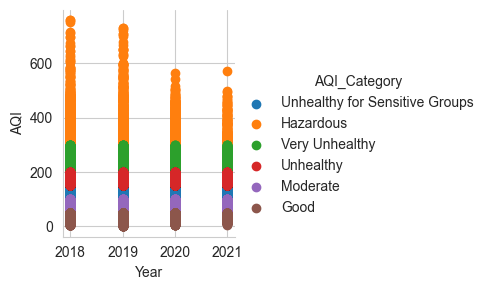

In [43]:
#Outliers using scatter plot for AQI with Year and AQI_Category as legends

import seaborn as sns

plt.figure(figsize=(10,10))
sns.set_style('whitegrid')  #whitegrid, darkgrid, dark, white
sns.FacetGrid(Final_file, hue='AQI_Category').map(plt.scatter,'Year','AQI').add_legend()
plt.show()

# From above it is clear that for 2018 above 650 is the outlier, for 2019 it seems that there is no outlier, for 2020 too there is no outlier but for 2021 we have 1 outlier around 600.

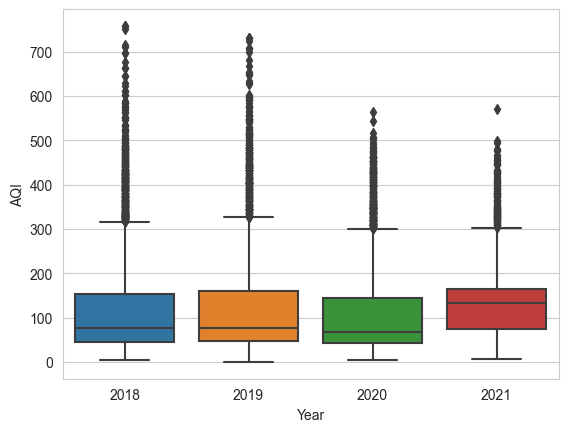

In [44]:
#Outliers using boxplot with Year as X axis and AQI as y-Axis

sns.boxplot(x=Final_file.Year, y=Final_file.AQI, data=pd.melt(Final_file))

plt.show()

In [45]:
#Removal of outlier using IQR method

# IQR calculation for AQI 
Q1_aqi = np.percentile(Final_file['AQI'], 25, method='midpoint')
Q3_aqi = np.percentile(Final_file['AQI'], 75, method='midpoint')
IQR_aqi = Q3_aqi - Q1_aqi
print('IQR_aqi',IQR_aqi)

# Above Upper bound
upper_aqi=Q3_aqi+1.5*IQR_aqi
upper_array_aqi=np.array(Final_file['AQI']>=upper_aqi)
print("Upper Bound:",upper_aqi)
print(upper_array_aqi.sum())

#Below Lower bound
lower_aqi=Q1_aqi-1.5*IQR_aqi
lower_array_aqi=np.array(Final_file['AQI']<=lower_aqi)
print("Lower Bound:",lower_aqi)
print(lower_array_aqi.sum())


IQR_aqi 108.0
Upper Bound: 318.0
1091
Lower Bound: -114.0
0


In [46]:
#Old shape
print("Old Shape: ", Final_file.shape)

Final_file_2=Final_file #created new set for removal of outliers

#created _1 values to differentiate with previous values and remove items from new data set

Q1_aqi_1 = Final_file_2['AQI'].quantile(0.25)
Q3_aqi_1 = Final_file_2['AQI'].quantile(0.75)
IQR_aqi_1 = Q3_aqi_1 - Q1_aqi_1
lower_aqi_1 = Q1_aqi_1 - 1.5*IQR_aqi_1
upper_aqi_1 = Q3_aqi_1 + 1.5*IQR_aqi_1
 
# Create arrays of Boolean values indicating the outlier rows
upper_array_aqi_1 = np.where(Final_file_2['AQI']>=upper_aqi_1)[0]
lower_array_aqi_1 = np.where(Final_file_2['AQI']<=lower_aqi_1)[0]
 
# Removing the outliers
Final_file_2.drop(index=upper_array_aqi_1, inplace=True, errors='coerce')
Final_file_2.drop(index=lower_array_aqi_1, inplace=True, errors='coerce')
 
# Print the new shape of the DataFrame
print("New Shape: ", Final_file_2.shape)



Old Shape:  (26665, 14)
New Shape:  (25469, 14)


<Figure size 10000x10000 with 0 Axes>

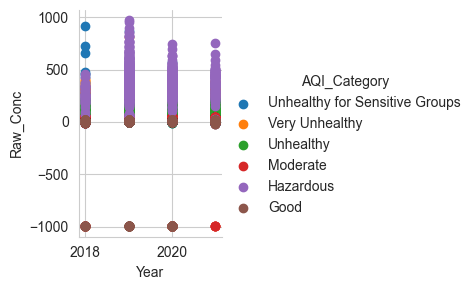

In [47]:
#Outliers using scatter plot for Raw_Conc with Year and AQI_Category as legends
plt.figure(figsize=(100,100))
sns.set_style('whitegrid')  #whitegrid, darkgrid, dark, white
sns.FacetGrid(Final_file, hue='AQI_Category').map(plt.scatter,'Year','Raw_Conc').add_legend()
plt.show()

# For the above scatter plot all of the years has outliers below 0 and 2021 has 1 outlier around 550 which is Hazardous category.

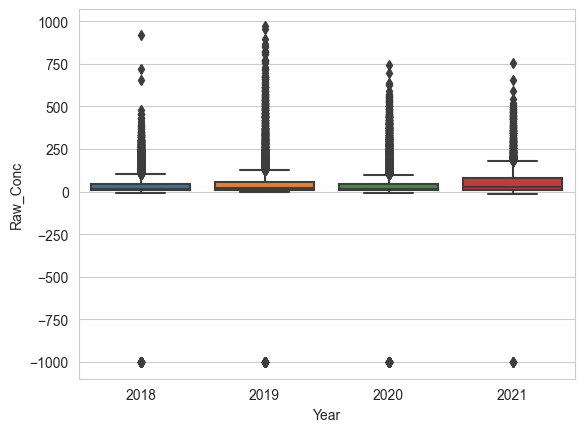

In [48]:
#Outliers using boxplot with Year as X axis and Raw_Conc as y-Axis

sns.boxplot(x=Final_file.Year, y=Final_file.Raw_Conc, data=pd.melt(Final_file))

plt.show()

In [49]:
#Removal of outlier using IQR method for Raw_Conc

# IQR calculation for AQI 
Q1_raw = np.percentile(Final_file['Raw_Conc'], 25, method='midpoint')
Q3_raw = np.percentile(Final_file['Raw_Conc'], 75, method='midpoint')
IQR_raw = Q3_raw - Q1_raw
print('IQR_raw',IQR_raw)

# Above Upper bound
upper_raw=Q3_raw+1.5*IQR_raw
upper_array_raw=np.array(Final_file['Raw_Conc']>=upper_raw)
print("Upper Bound:",upper_raw)
print(upper_array_raw.sum())

#Below Lower bound
lower_raw=Q1_raw-1.5*IQR_raw
lower_array_raw=np.array(Final_file['Raw_Conc']<=lower_raw)
print("Lower Bound:",lower_raw)
print(lower_array_raw.sum())


IQR_raw 44.0
Upper Bound: 118.0
2982
Lower Bound: -58.0
207


In [50]:
#Old shape
print("Old Shape: ", Final_file.shape)

Q1_raw_1 = Final_file_2['Raw_Conc'].quantile(0.25)
Q3_raw_1 = Final_file_2['Raw_Conc'].quantile(0.75)
IQR_raw_1 = Q3_aqi_1 - Q1_aqi_1
lower_raw_1 = Q1_raw_1 - 1.5*IQR_raw_1
upper_raw_1 = Q3_raw_1 + 1.5*IQR_raw_1
 
# Create arrays of Boolean values indicating the outlier rows
upper_array_raw_1 = np.where(Final_file_2['Raw_Conc']>=upper_raw_1)[0]
lower_array_raw_1 = np.where(Final_file_2['Raw_Conc']<=lower_raw_1)[0]
 
# Removing the outliers for raw_conc
Final_file_2.drop(index=upper_array_raw_1, inplace=True, errors='coerce')
Final_file_2.drop(index=lower_array_raw_1, inplace=True, errors='coerce')
 
# Print the new shape of the DataFrame
print("New Shape: ", Final_file_2.shape)



Old Shape:  (25469, 14)
New Shape:  (24413, 14)


<Figure size 1000x1000 with 0 Axes>

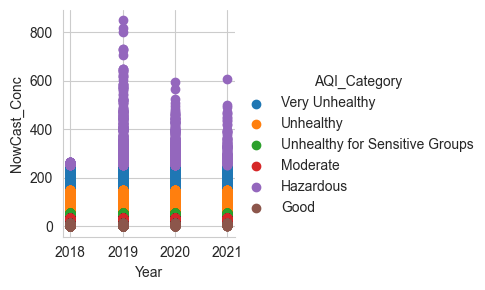

In [51]:
#Outliers using scatter plot for AQI with Year and AQI_Category as legends

plt.figure(figsize=(10,10))
sns.set_style('whitegrid')  #whitegrid, darkgrid, dark, white
sns.FacetGrid(Final_file, hue='AQI_Category').map(plt.scatter,'Year','NowCast_Conc').add_legend()
plt.show()

# For the above scatter plot we can see that for 2018 there is 1 outlier above 800 and 1 for 2021 which is 600 value and falls under Hazardous category.

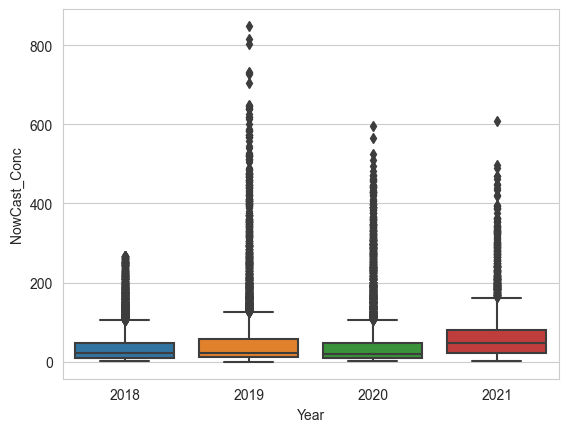

In [52]:
#Outliers using boxplot with Year as X axis and NowCast_Conc as y-Axis

sns.boxplot(x=Final_file.Year, y=Final_file.NowCast_Conc, data=pd.melt(Final_file))

plt.show()

In [53]:
#Removal of outlier using IQR method for NowCast_Conc

# IQR calculation for AQI 
Q1_now = np.percentile(Final_file['NowCast_Conc'], 25, method='midpoint')
Q3_now = np.percentile(Final_file['NowCast_Conc'], 75, method='midpoint')
IQR_now = Q3_now - Q1_now
print('IQR_now',IQR_now)

# Above Upper bound
upper_now=Q3_now+1.5*IQR_now
upper_array_now=np.array(Final_file['NowCast_Conc']>=upper_now)
print("Upper Bound:",upper_now)
print(upper_array_now.sum())

#Below Lower bound
lower_now=Q1_now-1.5*IQR_now
lower_array_now=np.array(Final_file['NowCast_Conc']<=lower_now)
print("Lower Bound:",lower_now)
print(lower_array_now.sum())


IQR_now 43.2
Upper Bound: 118.80000000000001
2694
Lower Bound: -54.000000000000014
0


In [54]:
#Old shape
print("Old Shape: ", Final_file.shape)

Q1_now_1 = Final_file_2['NowCast_Conc'].quantile(0.25)
Q3_now_1 = Final_file_2['NowCast_Conc'].quantile(0.75)
IQR_now_1 = Q3_now_1 - Q1_now_1
lower_now_1 = Q1_now_1 - 1.5*IQR_now_1
upper_now_1 = Q3_now_1 + 1.5*IQR_now_1
 
# Create arrays of Boolean values indicating the outlier rows
upper_array_now_1 = np.where(Final_file_2['NowCast_Conc']>=upper_now_1)[0]
lower_array_now_1 = np.where(Final_file_2['NowCast_Conc']<=lower_now_1)[0]
 
# Removing the outliers for NowCast_Conc
Final_file_2.drop(index=upper_array_now_1, inplace=True, errors='coerce')
Final_file_2.drop(index=lower_array_now_1, inplace=True, errors='coerce')
 
# Print the new shape of the DataFrame
print("New Shape: ", Final_file_2.shape)



Old Shape:  (24413, 14)
New Shape:  (22232, 14)


## Now the data is cleaned with removal of all the Outliers from NowCast_Conc, Raw_Conc & AQI values

(array([1.1854e+04, 5.6230e+03, 3.6800e+03, 6.1100e+02, 2.5300e+02,
        1.2100e+02, 5.7000e+01, 2.3000e+01, 7.0000e+00, 3.0000e+00]),
 array([  1. ,  73.9, 146.8, 219.7, 292.6, 365.5, 438.4, 511.3, 584.2,
        657.1, 730. ]),
 <BarContainer object of 10 artists>)

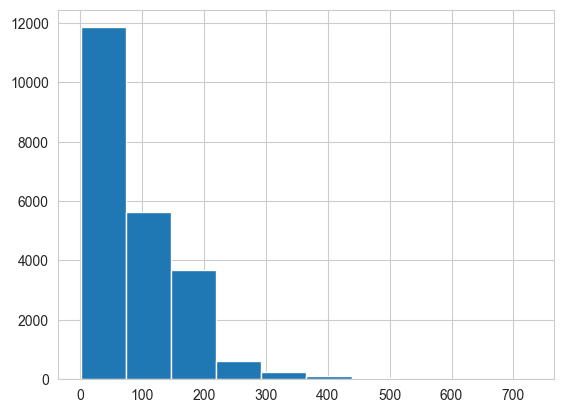

In [55]:
#Plotting histogram for AQI

plt.hist(Final_file_2.AQI)

## Above Histogram for AQI seems right skewed histogram

(array([1.5500e+02, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        2.0972e+04, 9.0300e+02, 1.6100e+02, 3.0000e+01, 1.1000e+01]),
 array([-999. , -803.5, -608. , -412.5, -217. ,  -21.5,  174. ,  369.5,
         565. ,  760.5,  956. ]),
 <BarContainer object of 10 artists>)

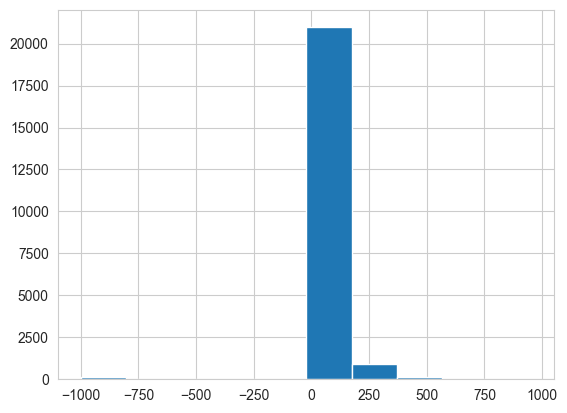

In [56]:
#Plotting histogram for Raw_Conc

plt.hist(Final_file_2.Raw_Conc)

## Above Histogram for Raw_Conc seems symmetrical histogram

(array([1.9282e+04, 1.8750e+03, 6.7800e+02, 2.2900e+02, 9.0000e+01,
        4.2000e+01, 2.1000e+01, 9.0000e+00, 3.0000e+00, 3.0000e+00]),
 array([-8.0000e-01,  8.4180e+01,  1.6916e+02,  2.5414e+02,  3.3912e+02,
         4.2410e+02,  5.0908e+02,  5.9406e+02,  6.7904e+02,  7.6402e+02,
         8.4900e+02]),
 <BarContainer object of 10 artists>)

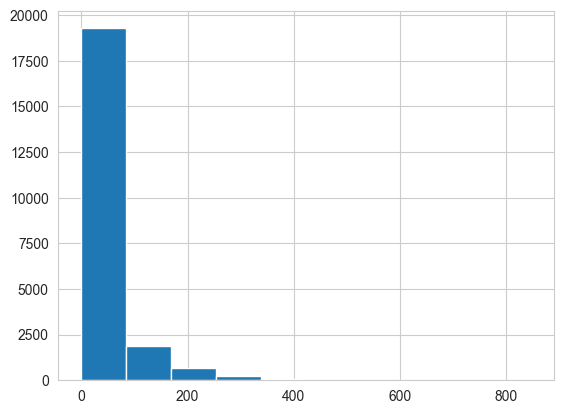

In [57]:
#Plotting histogram for NowCast_Conc

plt.hist(Final_file_2.NowCast_Conc)

## Above Histogram for NowCast_Conc seems right skewed histogram

In [58]:
Final_file_2.to_csv('outlier_cleaned_file.csv') #saving the file